In [1]:
%pip install tensorflowjs

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import os
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [4]:
dataset_path = '/content/drive/MyDrive/ngaksara/dataset'

In [5]:
if os.path.exists(dataset_path):
    print(f"✓ Dataset ditemukan di: {dataset_path}")
    print(f"✓ Jumlah folder kelas: {len(os.listdir(dataset_path))}")
    print(f"✓ Nama kelas: {os.listdir(dataset_path)}")
else:
    print(f"✗ Dataset tidak ditemukan di: {dataset_path}")
    print("Pastikan Anda sudah mount Drive dan path benar!")

✓ Dataset ditemukan di: /content/drive/MyDrive/ngaksara/dataset
✓ Jumlah folder kelas: 30
✓ Nama kelas: ['fa', 'a', 'ae', 'e', 'da', 'ha', 'eu', 'ga', 'ba', 'ca', 'ja', 'ka', 'na', 'nga', 'ma', 'nya', 'o', 'la', 'pa', 'i', 'ra', 'qa', 'xa', 'wa', 'ta', 'va', 'ya', 'u', 'za', 'sa']


In [6]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
for layer in base_model.layers:
    layer.trainable = False

In [18]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [8]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(30, activation='softmax')(x)

In [9]:
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 30)             │         3,87

 Total params: 21,174,238 (80.77 MB)

 Trainable params: 6,459,550 (24.64 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [10]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [12]:
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 1440 images belonging to 30 classes.


In [13]:
import json

class_indices_path = '/content/drive/MyDrive/ngaksara/model/tfjs_best_model/class_labels.json'
index_to_class = {v: k for k, v in train_generator.class_indices.items()}

with open(class_indices_path, 'w') as f:
    json.dump(index_to_class, f, indent=2)

print(f"✓ Class labels saved to: {class_indices_path}")

✓ Class labels saved to: /content/drive/MyDrive/ngaksara/model/tfjs_best_model/class_labels.json


In [14]:
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 360 images belonging to 30 classes.


In [15]:
print("INFORMASI DATASET")
print(f"Jumlah kelas: {len(train_generator.class_indices)}")
print(f"Nama kelas: {list(train_generator.class_indices.keys())}")
print(f"Jumlah data training: {train_generator.samples}")
print(f"Jumlah data validation: {validation_generator.samples}")
print(f"Total data: {train_generator.samples + validation_generator.samples}")

INFORMASI DATASET
Jumlah kelas: 30
Nama kelas: ['a', 'ae', 'ba', 'ca', 'da', 'e', 'eu', 'fa', 'ga', 'ha', 'i', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'o', 'pa', 'qa', 'ra', 'sa', 'ta', 'u', 'va', 'wa', 'xa', 'ya', 'za']
Jumlah data training: 1440
Jumlah data validation: 360
Total data: 1800


In [16]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

checkpoint_path = '/content/drive/MyDrive/ngaksara/model/best.h5'
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

callbacks = [early_stopping, model_checkpoint, reduce_lr]

In [17]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks,
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.0600 - loss: 3.5547 
Epoch 1: val_accuracy improved from -inf to 0.14167, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 624s 14s/step - accuracy: 0.0601 - loss: 3.5524 - val_accuracy: 0.1417 - val_loss: 3.2615 - learning_rate: 1.0000e-04
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.0900 - loss: 3.2798
Epoch 2: val_accuracy improved from 0.14167 to 0.19444, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 299ms/step - accuracy: 0.0901 - loss: 3.2790 - val_accuracy: 0.1944 - val_loss: 3.1124 - learning_rate: 1.0000e-04
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.0956 - loss: 3.1580
Epoch 3: val_accuracy improved from 0.19444 to 0.34444, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 289ms/step - accuracy: 0.0962 - loss: 3.1570 - val_accuracy: 0.3444 - val_loss: 2.9570 - learning_rate: 1.0000e-04
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.1577 - loss: 2.9515
Epoch 4: val_accuracy did not improve from 0.34444
45/45 ━━━━━━━━━━━━━━━━━━━━ 15s 325ms/step - accuracy: 0.1578 - loss: 2.9516 - val_accuracy: 0.3333 - val_loss: 2.7421 - learning_rate: 1.0000e-04
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.2239 - loss: 2.7997
Epoch 5: val_accuracy improved from 0.34444 to 0.44167, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 259ms/step - accuracy: 0.2238 - loss: 2.7996 - val_accuracy: 0.4417 - val_loss: 2.5614 - learning_rate: 1.0000e-04
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.2198 - loss: 2.6943
Epoch 6: val_accuracy improved from 0.44167 to 0.51944, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 275ms/step - accuracy: 0.2202 - loss: 2.6932 - val_accuracy: 0.5194 - val_loss: 2.3784 - learning_rate: 1.0000e-04
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.2700 - loss: 2.5521
Epoch 7: val_accuracy did not improve from 0.51944
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 291ms/step - accuracy: 0.2701 - loss: 2.5519 - val_accuracy: 0.5083 - val_loss: 2.2530 - learning_rate: 1.0000e-04
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.3035 - loss: 2.4386
Epoch 8: val_accuracy improved from 0.51944 to 0.61944, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 278ms/step - accuracy: 0.3036 - loss: 2.4378 - val_accuracy: 0.6194 - val_loss: 2.0898 - learning_rate: 1.0000e-04
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.3392 - loss: 2.2888
Epoch 9: val_accuracy improved from 0.61944 to 0.67222, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 24s 518ms/step - accuracy: 0.3393 - loss: 2.2882 - val_accuracy: 0.6722 - val_loss: 1.9039 - learning_rate: 1.0000e-04
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.3793 - loss: 2.1564
Epoch 10: val_accuracy did not improve from 0.67222
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 236ms/step - accuracy: 0.3793 - loss: 2.1561 - val_accuracy: 0.6278 - val_loss: 1.7173 - learning_rate: 1.0000e-04
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.4098 - loss: 1.9935
Epoch 11: val_accuracy improved from 0.67222 to 0.73611, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 15s 283ms/step - accuracy: 0.4103 - loss: 1.9929 - val_accuracy: 0.7361 - val_loss: 1.5695 - learning_rate: 1.0000e-04
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.3937 - loss: 2.0050
Epoch 12: val_accuracy improved from 0.73611 to 0.75833, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 318ms/step - accuracy: 0.3942 - loss: 2.0037 - val_accuracy: 0.7583 - val_loss: 1.4908 - learning_rate: 1.0000e-04
Epoch 13/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.4634 - loss: 1.8275
Epoch 13: val_accuracy improved from 0.75833 to 0.76111, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 236ms/step - accuracy: 0.4633 - loss: 1.8268 - val_accuracy: 0.7611 - val_loss: 1.3799 - learning_rate: 1.0000e-04
Epoch 14/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.5009 - loss: 1.7399
Epoch 14: val_accuracy did not improve from 0.76111
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 220ms/step - accuracy: 0.5005 - loss: 1.7401 - val_accuracy: 0.7556 - val_loss: 1.3885 - learning_rate: 1.0000e-04
Epoch 15/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.5044 - loss: 1.6991
Epoch 15: val_accuracy improved from 0.76111 to 0.79167, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 284ms/step - accuracy: 0.5045 - loss: 1.6979 - val_accuracy: 0.7917 - val_loss: 1.1896 - learning_rate: 1.0000e-04
Epoch 16/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.5313 - loss: 1.6390
Epoch 16: val_accuracy improved from 0.79167 to 0.83889, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 300ms/step - accuracy: 0.5315 - loss: 1.6376 - val_accuracy: 0.8389 - val_loss: 1.0714 - learning_rate: 1.0000e-04
Epoch 17/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.5527 - loss: 1.5199
Epoch 17: val_accuracy improved from 0.83889 to 0.84167, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 295ms/step - accuracy: 0.5524 - loss: 1.5204 - val_accuracy: 0.8417 - val_loss: 1.0471 - learning_rate: 1.0000e-04
Epoch 18/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.5950 - loss: 1.4242
Epoch 18: val_accuracy did not improve from 0.84167
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 224ms/step - accuracy: 0.5947 - loss: 1.4245 - val_accuracy: 0.8306 - val_loss: 1.0244 - learning_rate: 1.0000e-04
Epoch 19/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.5497 - loss: 1.4661
Epoch 19: val_accuracy improved from 0.84167 to 0.85278, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 267ms/step - accuracy: 0.5503 - loss: 1.4653 - val_accuracy: 0.8528 - val_loss: 0.8717 - learning_rate: 1.0000e-04
Epoch 20/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.5752 - loss: 1.4068
Epoch 20: val_accuracy improved from 0.85278 to 0.87500, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 299ms/step - accuracy: 0.5756 - loss: 1.4056 - val_accuracy: 0.8750 - val_loss: 0.8612 - learning_rate: 1.0000e-04
Epoch 21/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.6026 - loss: 1.3481
Epoch 21: val_accuracy improved from 0.87500 to 0.88889, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 297ms/step - accuracy: 0.6030 - loss: 1.3468 - val_accuracy: 0.8889 - val_loss: 0.8066 - learning_rate: 1.0000e-04
Epoch 22/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.6099 - loss: 1.3026
Epoch 22: val_accuracy did not improve from 0.88889
45/45 ━━━━━━━━━━━━━━━━━━━━ 19s 272ms/step - accuracy: 0.6101 - loss: 1.3019 - val_accuracy: 0.8639 - val_loss: 0.7734 - learning_rate: 1.0000e-04
Epoch 23/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.6306 - loss: 1.2192
Epoch 23: val_accuracy improved from 0.88889 to 0.89722, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 286ms/step - accuracy: 0.6308 - loss: 1.2185 - val_accuracy: 0.8972 - val_loss: 0.6954 - learning_rate: 1.0000e-04
Epoch 24/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.6278 - loss: 1.2653
Epoch 24: val_accuracy did not improve from 0.89722
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 274ms/step - accuracy: 0.6283 - loss: 1.2634 - val_accuracy: 0.8722 - val_loss: 0.7128 - learning_rate: 1.0000e-04
Epoch 25/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.6720 - loss: 1.0896
Epoch 25: val_accuracy did not improve from 0.89722
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 229ms/step - accuracy: 0.6720 - loss: 1.0899 - val_accuracy: 0.8722 - val_loss: 0.6892 - learning_rate: 1.0000e-04
Epoch 26/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.6625 - loss: 1.1110
Epoch 26: val_accuracy improved from 0.89722 to 0.90556, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 260ms/step - accuracy: 0.6630 - loss: 1.1097 - val_accuracy: 0.9056 - val_loss: 0.6391 - learning_rate: 1.0000e-04
Epoch 27/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.7065 - loss: 1.0012
Epoch 27: val_accuracy did not improve from 0.90556
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 267ms/step - accuracy: 0.7065 - loss: 1.0012 - val_accuracy: 0.8833 - val_loss: 0.6147 - learning_rate: 1.0000e-04
Epoch 28/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.7046 - loss: 0.9788
Epoch 28: val_accuracy improved from 0.90556 to 0.91389, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 261ms/step - accuracy: 0.7045 - loss: 0.9788 - val_accuracy: 0.9139 - val_loss: 0.5579 - learning_rate: 1.0000e-04
Epoch 29/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.7184 - loss: 0.9516
Epoch 29: val_accuracy improved from 0.91389 to 0.92500, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 281ms/step - accuracy: 0.7185 - loss: 0.9514 - val_accuracy: 0.9250 - val_loss: 0.5257 - learning_rate: 1.0000e-04
Epoch 30/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.7433 - loss: 0.9061
Epoch 30: val_accuracy improved from 0.92500 to 0.93611, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 16s 346ms/step - accuracy: 0.7434 - loss: 0.9056 - val_accuracy: 0.9361 - val_loss: 0.4862 - learning_rate: 1.0000e-04
Epoch 31/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.7296 - loss: 0.8640
Epoch 31: val_accuracy did not improve from 0.93611
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 278ms/step - accuracy: 0.7294 - loss: 0.8644 - val_accuracy: 0.9194 - val_loss: 0.4673 - learning_rate: 1.0000e-04
Epoch 32/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.7239 - loss: 0.8685
Epoch 32: val_accuracy did not improve from 0.93611
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 228ms/step - accuracy: 0.7239 - loss: 0.8685 - val_accuracy: 0.9361 - val_loss: 0.4595 - learning_rate: 1.0000e-04
Epoch 33/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.7611 - loss: 0.8422
Epoch 33: val_accuracy did not improve from 0.93611
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 225ms/step - accuracy: 0.7608 - loss: 0.8426 - val_accuracy: 0.9222 - val_loss: 0.4581 - learning_rate: 1.0000e-04

45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 267ms/step - accuracy: 0.8158 - loss: 0.6443 - val_accuracy: 0.9444 - val_loss: 0.3192 - learning_rate: 1.0000e-04
Epoch 42/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.8274 - loss: 0.6234
Epoch 42: val_accuracy did not improve from 0.94444
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 230ms/step - accuracy: 0.8271 - loss: 0.6237 - val_accuracy: 0.9250 - val_loss: 0.3357 - learning_rate: 1.0000e-04
Epoch 43/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.7992 - loss: 0.6502
Epoch 43: val_accuracy did not improve from 0.94444
45/45 ━━━━━━━━━━━━━━━━━━━━ 20s 220ms/step - accuracy: 0.7996 - loss: 0.6495 - val_accuracy: 0.9278 - val_loss: 0.3214 - learning_rate: 1.0000e-04
Epoch 44/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.7986 - loss: 0.6572
Epoch 44: val_accuracy improved from 0.94444 to 0.94722, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 275ms/step - accuracy: 0.7987 - loss: 0.6568 - val_accuracy: 0.9472 - val_loss: 0.2930 - learning_rate: 1.0000e-04
Epoch 45/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.8381 - loss: 0.5869
Epoch 45: val_accuracy improved from 0.94722 to 0.95833, saving model to /content/drive/MyDrive/ngaksara/model/best.h5


45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 297ms/step - accuracy: 0.8378 - loss: 0.5874 - val_accuracy: 0.9583 - val_loss: 0.2773 - learning_rate: 1.0000e-04
Epoch 46/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.8359 - loss: 0.5502
Epoch 46: val_accuracy did not improve from 0.95833
45/45 ━━━━━━━━━━━━━━━━━━━━ 15s 323ms/step - accuracy: 0.8358 - loss: 0.5506 - val_accuracy: 0.9472 - val_loss: 0.2706 - learning_rate: 1.0000e-04
Epoch 47/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.8175 - loss: 0.5919
Epoch 47: val_accuracy did not improve from 0.95833
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 243ms/step - accuracy: 0.8177 - loss: 0.5912 - val_accuracy: 0.9500 - val_loss: 0.2521 - learning_rate: 1.0000e-04
Epoch 48/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - accuracy: 0.8440 - loss: 0.5439
Epoch 48: val_accuracy did not improve from 0.95833
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 230ms/step - accuracy: 0.8438 - loss: 0.5440 - val_accuracy: 0.9500 - val_loss: 0.2666 - learning_rate: 1.0000e-04

45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 263ms/step - accuracy: 0.8429 - loss: 0.5502 - val_accuracy: 0.9611 - val_loss: 0.2513 - learning_rate: 1.0000e-04
Epoch 50/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.8357 - loss: 0.5425
Epoch 50: val_accuracy did not improve from 0.96111
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 228ms/step - accuracy: 0.8360 - loss: 0.5420 - val_accuracy: 0.9500 - val_loss: 0.2494 - learning_rate: 1.0000e-04
Restoring model weights from the end of the best epoch: 50.


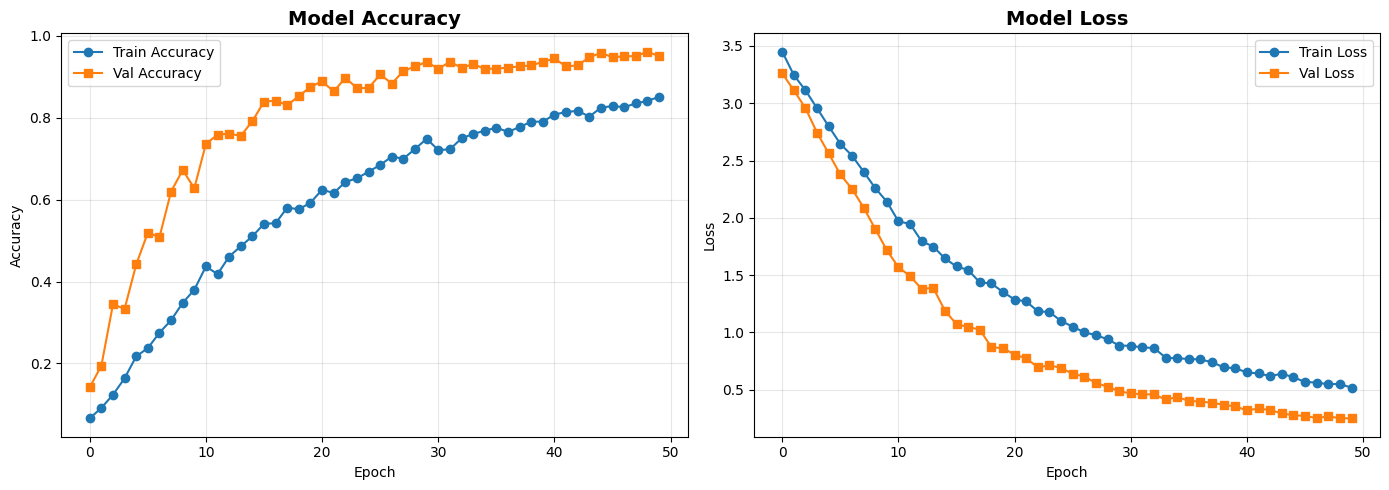

In [19]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='s')
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='s')
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [20]:
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]
best_val_acc = max(history.history['val_accuracy'])
best_epoch = history.history['val_accuracy'].index(best_val_acc) + 1

print("HASIL TRAINING")
print(f"Total Epoch Dijalankan: {len(history.history['accuracy'])}")
print(f"Best Epoch: {best_epoch}")
print(f"Best Validation Accuracy: {best_val_acc:.4f} ({best_val_acc*100:.2f}%)")
print(f"\nFinal Training Accuracy: {final_train_acc:.4f} ({final_train_acc*100:.2f}%)")
print(f"Final Validation Accuracy: {final_val_acc:.4f} ({final_val_acc*100:.2f}%)")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")

HASIL TRAINING
Total Epoch Dijalankan: 50
Best Epoch: 49
Best Validation Accuracy: 0.9611 (96.11%)

Final Training Accuracy: 0.8507 (85.07%)
Final Validation Accuracy: 0.9500 (95.00%)
Final Training Loss: 0.5168
Final Validation Loss: 0.2494


In [26]:
checkpoint_path = '/content/drive/MyDrive/ngaksara/model/best.h5'

print("Loading best model...")
best_model = load_model(checkpoint_path)
print(f"✓ Best model loaded dari: {checkpoint_path}")

print("\n Model files:")
print(f"  - best.h5 ({os.path.getsize(checkpoint_path) / (1024 * 1024):.2f} MB)")

Loading best model...


✓ Best model loaded dari: /content/drive/MyDrive/ngaksara/model/best.h5

 Model files:
  - best.h5 (130.16 MB)


In [27]:
print("Generating predictions for confusion matrix...")
validation_generator.reset()

y_pred = best_model.predict(validation_generator, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)

y_true = validation_generator.classes

class_names = list(train_generator.class_indices.keys())

print(f"✓ Total predictions: {len(y_pred_classes)}")
print(f"✓ Total true labels: {len(y_true)}")

Generating predictions for confusion matrix...
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 221ms/step
✓ Total predictions: 360
✓ Total true labels: 360


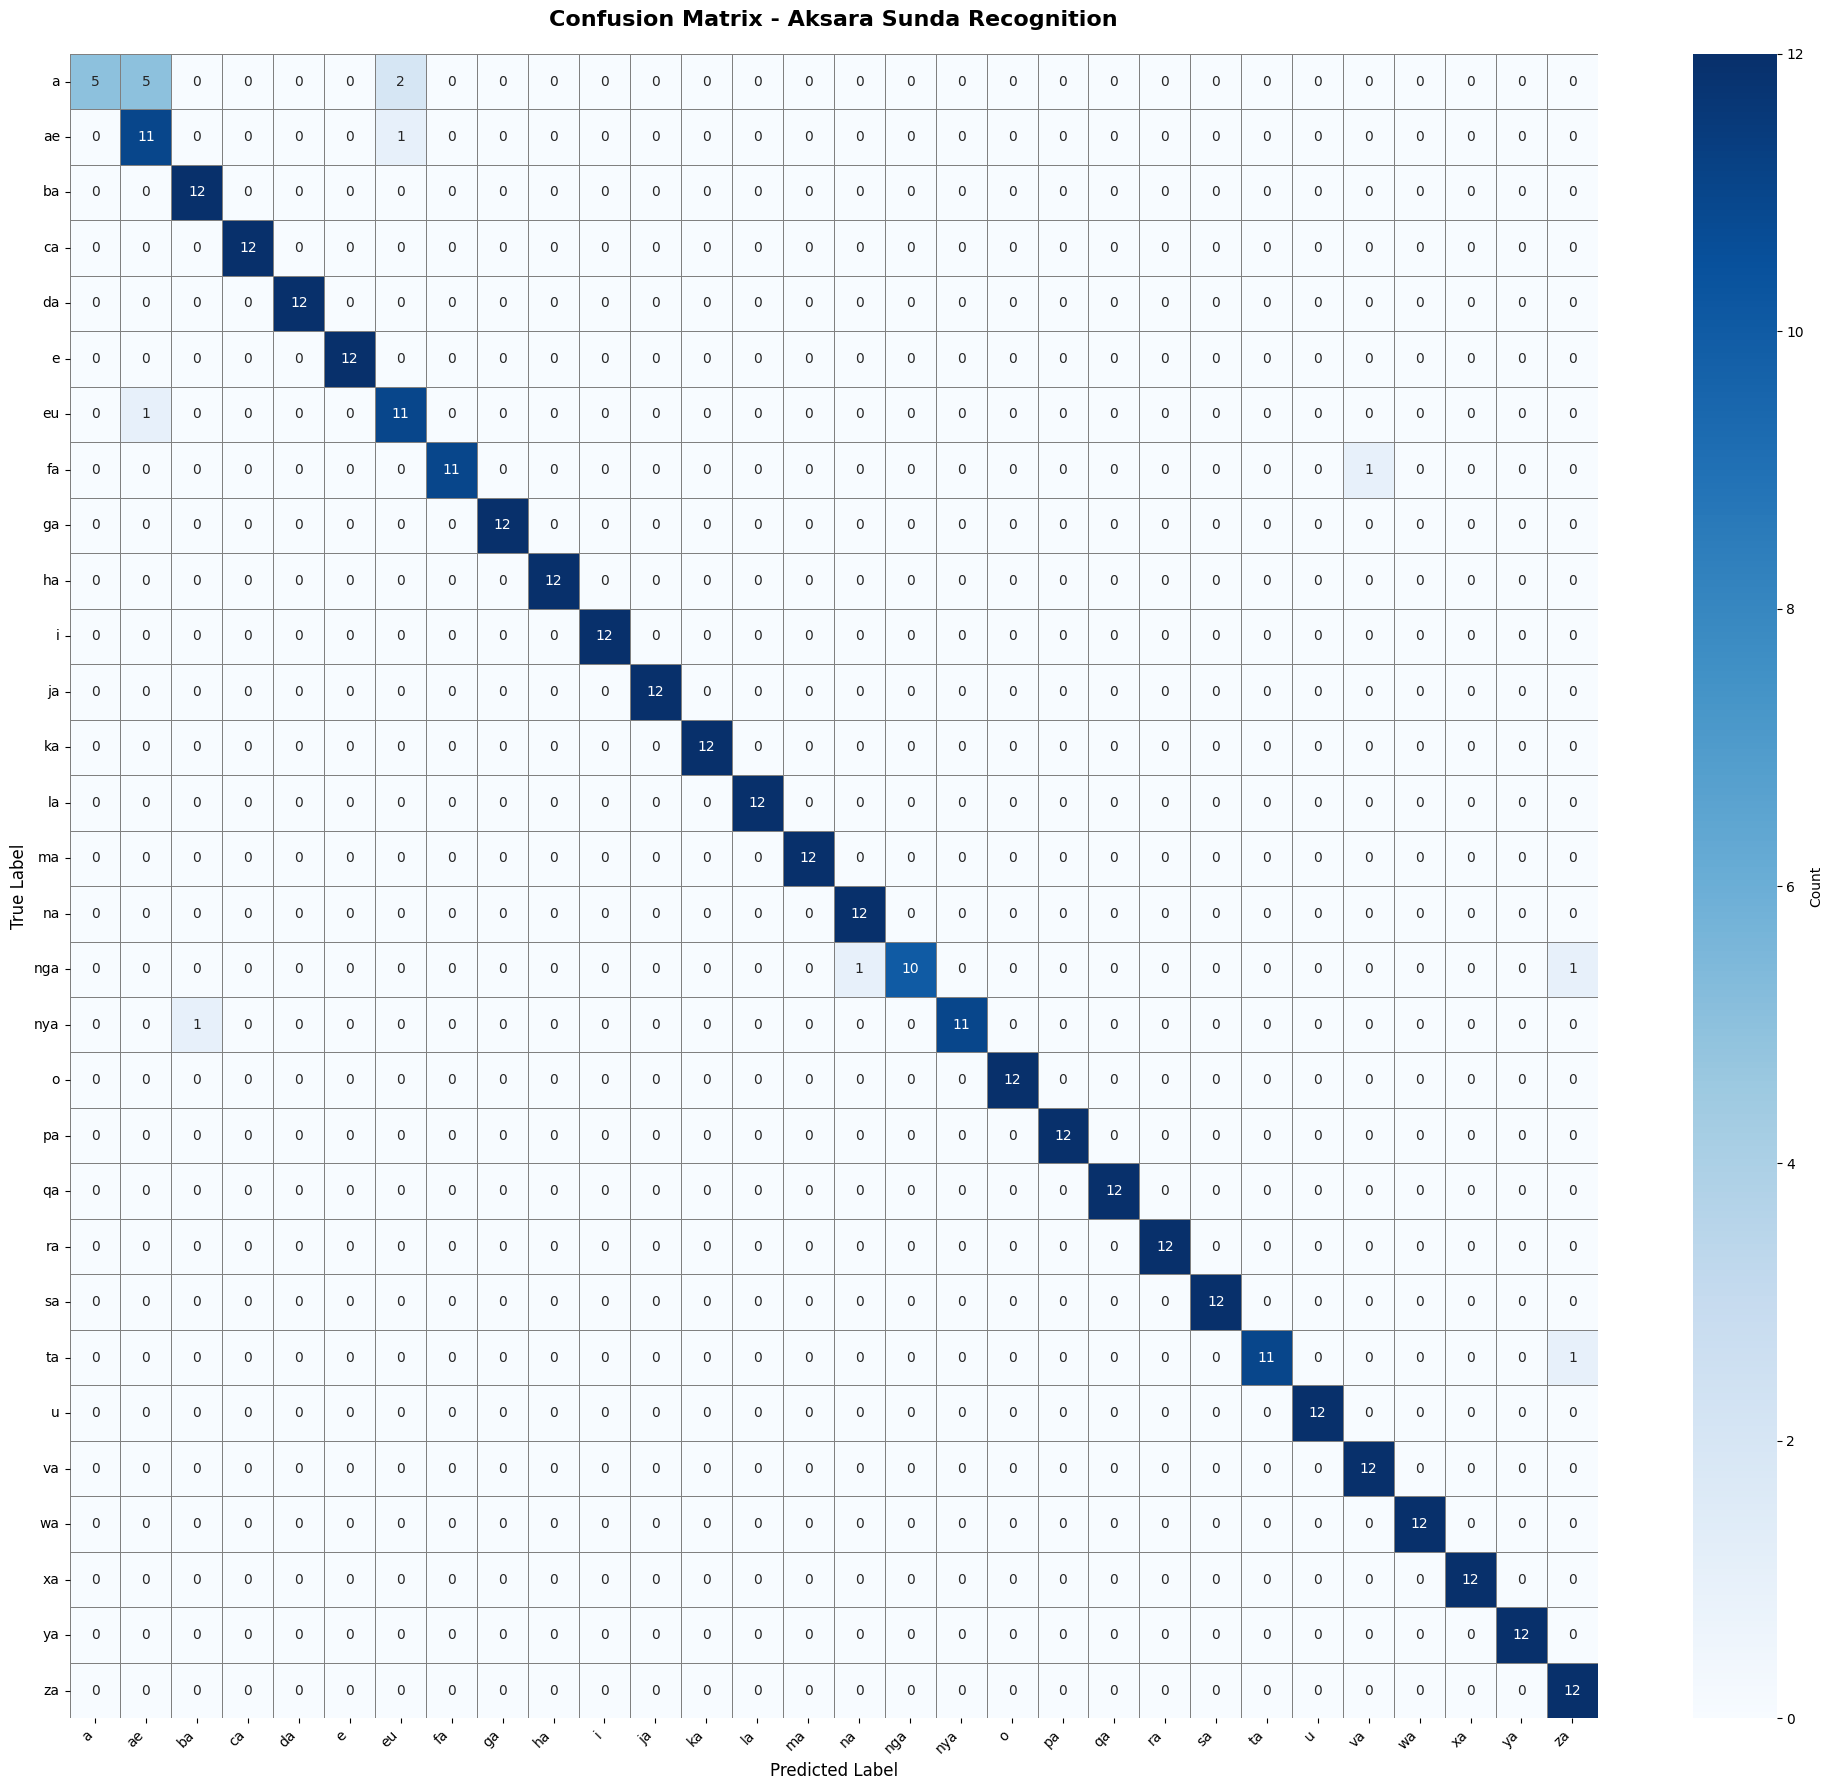


ACCURACY PER CLASS:
a         : 0.4167 (41.67%)
ae        : 0.9167 (91.67%)
ba        : 1.0000 (100.00%)
ca        : 1.0000 (100.00%)
da        : 1.0000 (100.00%)
e         : 1.0000 (100.00%)
eu        : 0.9167 (91.67%)
fa        : 0.9167 (91.67%)
ga        : 1.0000 (100.00%)
ha        : 1.0000 (100.00%)
i         : 1.0000 (100.00%)
ja        : 1.0000 (100.00%)
ka        : 1.0000 (100.00%)
la        : 1.0000 (100.00%)
ma        : 1.0000 (100.00%)
na        : 1.0000 (100.00%)
nga       : 0.8333 (83.33%)
nya       : 0.9167 (91.67%)
o         : 1.0000 (100.00%)
pa        : 1.0000 (100.00%)
qa        : 1.0000 (100.00%)
ra        : 1.0000 (100.00%)
sa        : 1.0000 (100.00%)
ta        : 0.9167 (91.67%)
u         : 1.0000 (100.00%)
va        : 1.0000 (100.00%)
wa        : 1.0000 (100.00%)
xa        : 1.0000 (100.00%)
ya        : 1.0000 (100.00%)
za        : 1.0000 (100.00%)


In [28]:
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(20, 18))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names,
            cbar_kws={'label': 'Count'},
            linewidths=0.5,
            linecolor='gray')
plt.title('Confusion Matrix - Aksara Sunda Recognition', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

class_accuracy = cm.diagonal() / cm.sum(axis=1)
print("\nACCURACY PER CLASS:")
for i, acc in enumerate(class_accuracy):
    print(f"{class_names[i]:10s}: {acc:.4f} ({acc*100:.2f}%)")

In [29]:
report = classification_report(y_true, y_pred_classes,
                               target_names=class_names,
                               digits=4)
print("CLASSIFICATION REPORT:")
print(report)

accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print("\nOVERALL METRICS:")
print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
print(f"F1-Score:  {f1:.4f} ({f1*100:.2f}%)")

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           a     1.0000    0.4167    0.5882        12
          ae     0.6471    0.9167    0.7586        12
          ba     0.9231    1.0000    0.9600        12
          ca     1.0000    1.0000    1.0000        12
          da     1.0000    1.0000    1.0000        12
           e     1.0000    1.0000    1.0000        12
          eu     0.7857    0.9167    0.8462        12
          fa     1.0000    0.9167    0.9565        12
          ga     1.0000    1.0000    1.0000        12
          ha     1.0000    1.0000    1.0000        12
           i     1.0000    1.0000    1.0000        12
          ja     1.0000    1.0000    1.0000        12
          ka     1.0000    1.0000    1.0000        12
          la     1.0000    1.0000    1.0000        12
          ma     1.0000    1.0000    1.0000        12
          na     0.9231    1.0000    0.9600        12
         nga     1.0000    0.8333    0.9091        12
    

In [30]:
print("\nTOP 10 MOST CONFUSED CLASSES:")
confused_pairs = []
for i in range(len(cm)):
    for j in range(len(cm)):
        if i != j and cm[i][j] > 0:
            confused_pairs.append((class_names[i], class_names[j], cm[i][j]))

confused_pairs.sort(key=lambda x: x[2], reverse=True)

for idx, (true_class, pred_class, count) in enumerate(confused_pairs[:10], 1):
    print(f"{idx:2d}. {true_class:10s} → {pred_class:10s}: {count:3d} times")


TOP 10 MOST CONFUSED CLASSES:
 1. a          → ae        :   5 times
 2. a          → eu        :   2 times
 3. ae         → eu        :   1 times
 4. eu         → ae        :   1 times
 5. fa         → va        :   1 times
 6. nga        → na        :   1 times
 7. nga        → za        :   1 times
 8. nya        → ba        :   1 times
 9. ta         → za        :   1 times
